# Qtn 1: Malnutrition and GDP per capita

### Importing Libraries & declaring Country and Mulnutrition data files

In [1]:
import pandas as pd

# Load GDP data
gdp_data = pd.read_excel('gdp.xls', sheet_name='Data')
gdp_country_metadata = pd.read_excel('gdp.xls', sheet_name='Metadata - Countries')
gdp_indicator_metadata = pd.read_excel('gdp.xls', sheet_name='Metadata - Indicators')

# Load malnutrition data
malnutrition_data = pd.read_excel('malnutrition.xls', sheet_name='Data')
malnutrition_country_metadata = pd.read_excel('malnutrition.xls', sheet_name='Metadata - Countries')
malnutrition_indicator_metadata = pd.read_excel('malnutrition.xls', sheet_name='Metadata - Indicators')


### What relationship do you think should exist between these two variables?

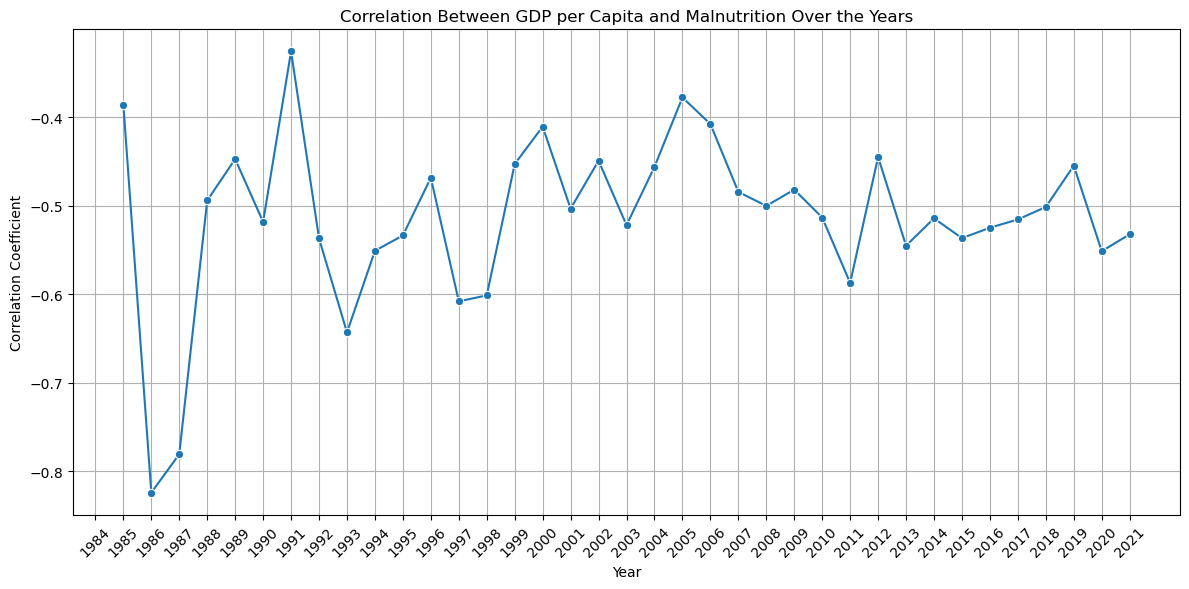

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the row indices where the relevant data starts (4th row)
gdp_data_start_row = 4
malnutrition_data_start_row = 4

# Skip unnecessary rows and reset index for both DataFrames
gdp_data = gdp_data[gdp_data_start_row:].reset_index(drop=True)
malnutrition_data = malnutrition_data[malnutrition_data_start_row:].reset_index(drop=True)

# Define column names for both DataFrames
gdp_columns = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"] + list(map(str, range(1960, 2023)))
malnutrition_columns = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"] + list(map(str, range(1960, 2023)))

# Set the cleaned column names for both DataFrames
gdp_data.columns = gdp_columns
malnutrition_data.columns = malnutrition_columns

# Select relevant columns for analysis
columns_to_keep_gdp = ["Country Name", "Country Code"] + list(map(str, range(1960, 2022)))
columns_to_keep_malnutrition = ["Country Name", "Country Code"] + list(map(str, range(1960, 2022)))

data_for_analysis_gdp = gdp_data[columns_to_keep_gdp]
data_for_analysis_malnutrition = malnutrition_data[columns_to_keep_malnutrition]

# Calculate the correlation between GDP per capita and malnutrition for each year
correlation_values = data_for_analysis_gdp.corrwith(data_for_analysis_malnutrition, axis=0, numeric_only=True)

# Plot the correlation values
plt.figure(figsize=(12, 6))
sns.lineplot(x=correlation_values.index, y=correlation_values.values, marker="o")
plt.title("Correlation Between GDP per Capita and Malnutrition Over the Years")
plt.xlabel("Year")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Extract GDP and Malnutrition data values as matrices and produce the required scatter plot.


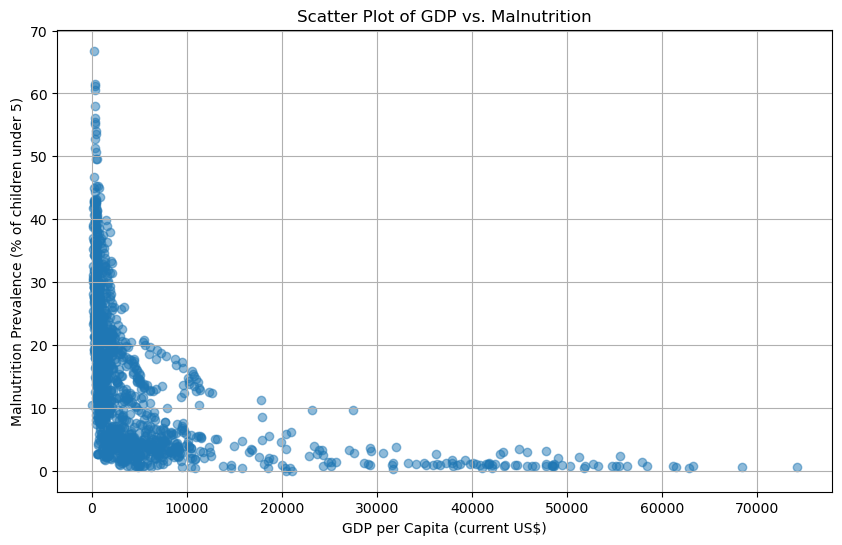

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded and cleaned the GDP and Malnutrition DataFrames

# Select the relevant columns for GDP and Malnutrition
gdp_columns = list(map(str, range(1960, 2023)))
malnutrition_columns = list(map(str, range(1960, 2023)))

gdp_data_values = gdp_data[gdp_columns].values
malnutrition_data_values = malnutrition_data[malnutrition_columns].values

# Ensure that both matrices have the same shape
if gdp_data_values.shape != malnutrition_data_values.shape:
    raise ValueError("GDP and Malnutrition data matrices must have the same shape.")

# Extract only the non-NaN values
valid_indices = ~pd.isna(gdp_data_values) & ~pd.isna(malnutrition_data_values)
gdp_values = gdp_data_values[valid_indices]
malnutrition_values = malnutrition_data_values[valid_indices]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gdp_values, malnutrition_values, alpha=0.5)
plt.title("Scatter Plot of GDP vs. Malnutrition")
plt.xlabel("GDP per Capita (current US$)")
plt.ylabel("Malnutrition Prevalence (% of children under 5)")
plt.grid(True)
plt.show()


# Qtn 2: Time series plot commodity prices

### 2.1: Importing Libraries and declaring Quandl API Key

In [4]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = 'dhQHYoU1dv4zQ4fxm1Dx'

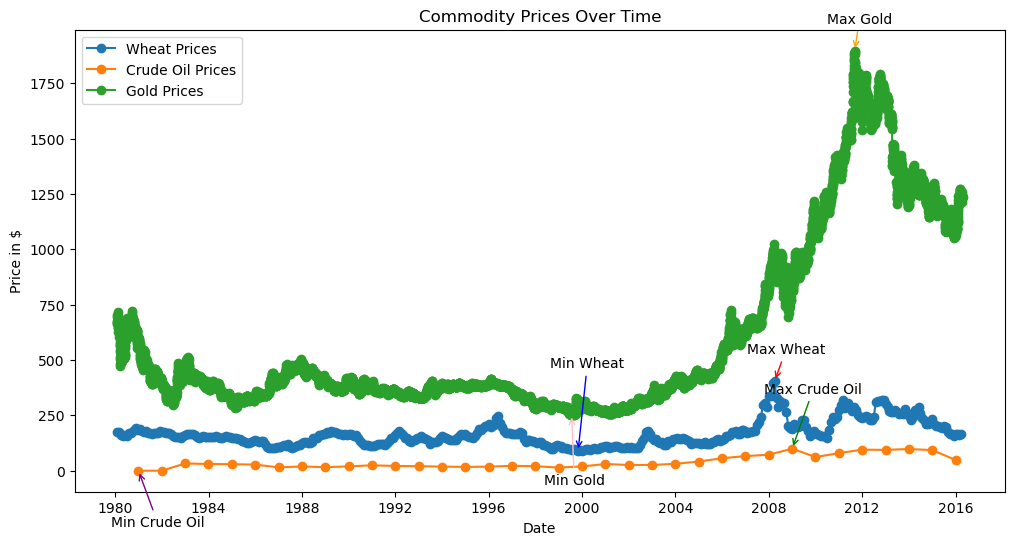

In [5]:
# Download the datasets
wheat_data = quandl.get("ODA/PWHEAMT_USD")
crude_oil_data = quandl.get("WGEC/WLD_CRUDE_WTI")
gold_data = quandl.get("BUNDESBANK/BBK01_WT5511")

# Synchronize timestamps
start_date = max(wheat_data.index.min(), crude_oil_data.index.min(), gold_data.index.min())
end_date = min(wheat_data.index.max(), crude_oil_data.index.max(), gold_data.index.max())

wheat_data = wheat_data.loc[start_date:end_date]
crude_oil_data = crude_oil_data.loc[start_date:end_date]
gold_data = gold_data.loc[start_date:end_date]

# Create a plot for all three commodities
plt.figure(figsize=(12, 6))
plt.plot(wheat_data.index, wheat_data['Value'], label='Wheat Prices', marker='o')
plt.plot(crude_oil_data.index, crude_oil_data['Value'], label='Crude Oil Prices', marker='o')
plt.plot(gold_data.index, gold_data['Value'], label='Gold Prices', marker='o')

# Find and annotate maximum and minimum points
wheat_max = wheat_data['Value'].idxmax()
wheat_min = wheat_data['Value'].idxmin()
crude_oil_max = crude_oil_data['Value'].idxmax()
crude_oil_min = crude_oil_data['Value'].idxmin()
gold_max = gold_data['Value'].idxmax()
gold_min = gold_data['Value'].idxmin()

plt.annotate('Max Wheat', xy=(wheat_max, wheat_data['Value'].max()), xytext=(-20, 20),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('Min Wheat', xy=(wheat_min, wheat_data['Value'].min()), xytext=(-20, 60),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'))
plt.annotate('Max Crude Oil', xy=(crude_oil_max, crude_oil_data['Value'].max()), xytext=(-20, 40),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='green'))
plt.annotate('Min Crude Oil', xy=(crude_oil_min, crude_oil_data['Value'].min()), xytext=(-20, -40),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='purple'))
plt.annotate('Max Gold', xy=(gold_max, gold_data['Value'].max()), xytext=(-20, 20),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='orange'))
plt.annotate('Min Gold', xy=(gold_min, gold_data['Value'].min()), xytext=(-20, -50),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='pink'))

# Add a legend and labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.title('Commodity Prices Over Time')

# Display the plot
plt.show()


# Qtn 3: Summary statistics of datasets

### 3.1: Importing Python Libraries

In [6]:
import pandas as pd
import numpy as np
from tabulate import tabulate

### 3.2: Clean and format data method

In [7]:
# Function to clean and format data
def clean_and_format_data(data):
    data = data[4:].reset_index(drop=True)  # Skip unnecessary rows and reset the index
    columns = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"] + list(map(str, range(1960, 2023)))
    data.columns = columns
    columns_to_keep = ["Country Name", "Country Code"] + list(map(str, range(1960, 2022)))
    return data[columns_to_keep]

### 3.3: Data importing function

In [8]:
# Function to load data from Excel file
def load_data(file_name, sheet_name):
    data = pd.read_excel(file_name, sheet_name=sheet_name)
    return clean_and_format_data(data)

# Load CO2 data
co2_data = load_data('co2.xls', 'Data')

# Load Enrolment data
enrolment_data = load_data('enrolment.xls', 'Data') 

### 3.4: Filtering emission and Statistic calculation for countries in 2010

In [9]:
# Select emissions for all countries in 2010
co2_2010 = co2_data[['Country Name', '2010']].dropna()
enrollment_2010 = enrolment_data[['Country Name', '2010']].dropna()

# Function to calculate and return summary statistics
def calculate_summary_statistics(data):
    return data['2010'].describe(percentiles=[.05, .25, .75, .95])

# Create tables for CO2 emissions and primary school enrollment summary statistics
co2_summary_statistics = calculate_summary_statistics(co2_2010)
enrollment_summary_statistics = calculate_summary_statistics(enrollment_2010)

### 3.5: Displaying statistics for Co2 & Enrolment for 2010

In [10]:

# Function to display summary statistics in a table
def display_summary_table(summary_statistics, title):
    table = pd.DataFrame({
        f'{title} 2010 Statistics': summary_statistics
    })
    print(f"\n{title} 2010 Summary Statistics:\n")
    print(tabulate(table, headers='keys', tablefmt='pretty'))

# Display the summary statistics tables
display_summary_table(co2_summary_statistics, 'CO2 Emissions')
display_summary_table(enrollment_summary_statistics, 'Primary School Enrollment')



CO2 Emissions 2010 Summary Statistics:

+-------+-------------------------------+
|       | CO2 Emissions 2010 Statistics |
+-------+-------------------------------+
| count |             239.0             |
| mean  |       4.304658991344185       |
|  std  |       5.069185691529372       |
|  min  |      0.03542390626087138      |
|  5%   |      0.11486037886188374      |
|  25%  |      0.7560111050219943       |
|  50%  |      2.6671397243982278       |
|  75%  |       5.891798207361757       |
|  95%  |      15.172008595332846       |
|  max  |      35.548268343698055       |
+-------+-------------------------------+

Primary School Enrollment 2010 Summary Statistics:

+-------+-------------------------------------------+
|       | Primary School Enrollment 2010 Statistics |
+-------+-------------------------------------------+
| count |                   165.0                   |
| mean  |             90.05166624242425             |
|  std  |             9.531660445521796         

# Qtn 4: Fertility rate and GDP per capita

### 4.1: Importing Python Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

### 4.2: Clean, format, and import data Method

In [12]:
def clean_and_load_data(file_name, sheet_name):
    data = pd.read_excel(file_name, sheet_name=sheet_name)
    data = data[4:].reset_index(drop=True)  # Skip unnecessary rows and reset the index
    columns = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"] + list(map(str, range(1960, 2023)))
    data.columns = columns
    columns_to_keep = ["Country Name", "Country Code"] + list(map(str, range(1960, 2022)))
    return data[columns_to_keep]

### 4.3: Scatter Plot Method

In [13]:
def generate_scatter_plot(gdp_data, fertility_rate_data, year):
    # Select GDP and Fertility Rate for all countries in the given year
    gdp_year = gdp_data[['Country Name', year]].dropna()
    fertility_rate_year = fertility_rate_data[['Country Name', year]].dropna()

    # Merge GDP and Fertility Rate data on 'Country Name'
    merged_data = pd.merge(gdp_year, fertility_rate_year, on='Country Name')

    # Rename columns for clarity
    merged_data.rename(columns={year + '_x': 'GDP per capita (USD)', year + '_y': 'Fertility Rate'}, inplace=True)

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_data['GDP per capita (USD)'], merged_data['Fertility Rate'], alpha=0.5)
    plt.title(f'Scatter Plot of Fertility Rate vs. GDP per Capita ({year})')
    plt.xlabel('GDP per capita (USD)')
    plt.ylabel('Fertility Rate')
    plt.grid(True)
    plt.show()

### 4.4: Scatter Plot Method

In [16]:
def generate_cdf_plot(data, year, label, position):
    plt.subplot(1, 2, position)  # Create two subplots in a single row
    plt.hist(data[year], bins=50, density=True, cumulative=True, histtype='step', label=f'CDF {label}')
    mean = data[year].mean()
    median = data[year].median()
    plt.axvline(mean, color='r', linestyle='--', label=f'Mean ({label}): {mean:.2f}')
    plt.axvline(median, color='g', linestyle='--', label=f'Median ({label}): {median:.2f}')
    plt.title(f'CDF - Fertility Rate ({label})')
    plt.xlabel('Fertility Rate')
    plt.ylabel('CDF')
    plt.legend()

### 4.5: 

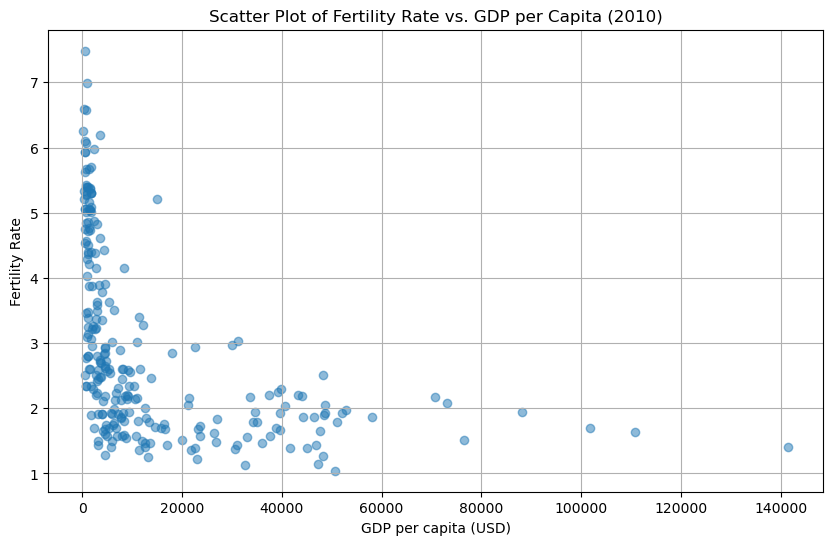

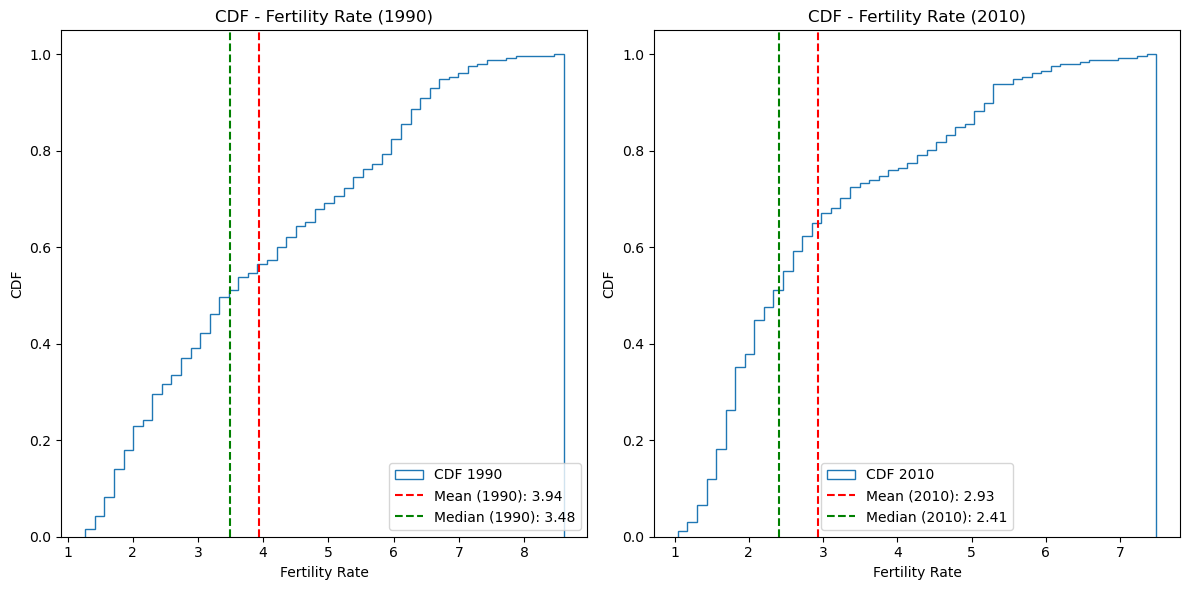

In [17]:

def main():
    
    # Import GDP data
    gdp_data = clean_and_load_data('gdp.xls', 'Data')
    # Import Fertility Rate data
    fertility_rate_data = clean_and_load_data('fertility_rate.xls', 'Data')
    
    # Generate scatter plot for Fertility Rate vs. GDP per capita in 2010
    generate_scatter_plot(gdp_data, fertility_rate_data, '2010')

     # Create a figure with two subplots
    plt.figure(figsize=(12, 6))
    
    print("\n\n")
    
    # Generate CDF plots for Fertility Rate in 1990 and 2010
    generate_cdf_plot(fertility_rate_data, '1990', '1990', 1)  # Position 1 (left)
    generate_cdf_plot(fertility_rate_data, '2010', '2010', 2)  # Position 2 (right)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

if __name__ == "__main__":
    main()